In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from sklearn import datasets

In [18]:
#Retrieving the data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

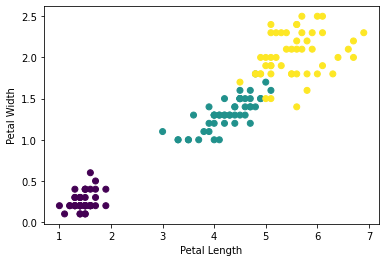

In [20]:
#Plotting the data using plt
mtp.scatter(X[:, 0],X[:, 1],c=y)
mtp.xlabel("Petal Length")
mtp.ylabel("Petal Width")

mtp.show()

